### Calculate customer churn rate

In [1]:
%pip install seaborn

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip available: 22.1.2 -> 22.2
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
from time import strftime
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('https://raw.githubusercontent.com/fnneves/customer_retention/master/raw.csv')
df.head(10)

,username,signup_date,ref_date,money,time,country
0,U10000,01/10/2019,01/10/2019,2,89,Canada
1,U10000,01/10/2019,07/10/2019,0,35,Canada
2,U10000,01/10/2019,09/10/2019,2,4,Canada
3,U10000,01/10/2019,10/10/2019,1,5,Canada
4,U10000,01/10/2019,12/10/2019,1,17,Canada
5,U10000,01/10/2019,15/10/2019,0,16,Canada
6,U10001,01/10/2019,01/10/2019,1,134,Canada
7,U10001,01/10/2019,02/10/2019,2,60,Canada
8,U10001,01/10/2019,03/10/2019,0,55,Canada
9,U10001,01/10/2019,04/10/2019,1,77,Canada


In [3]:
df.signup_date = pd.to_datetime(df.signup_date, format='%d/%m/%Y')

df.ref_date = pd.to_datetime(df.ref_date, format='%d/%m/%Y')

df['seniority'] = (df['ref_date'] - df['signup_date']).dt.days + 1

df.head(10)

,username,signup_date,ref_date,money,time,country,seniority
0,U10000,2019-10-01,2019-10-01,2,89,Canada,1
1,U10000,2019-10-01,2019-10-07,0,35,Canada,7
2,U10000,2019-10-01,2019-10-09,2,4,Canada,9
3,U10000,2019-10-01,2019-10-10,1,5,Canada,10
4,U10000,2019-10-01,2019-10-12,1,17,Canada,12
5,U10000,2019-10-01,2019-10-15,0,16,Canada,15
6,U10001,2019-10-01,2019-10-01,1,134,Canada,1
7,U10001,2019-10-01,2019-10-02,2,60,Canada,2
8,U10001,2019-10-01,2019-10-03,0,55,Canada,3
9,U10001,2019-10-01,2019-10-04,1,77,Canada,4


In [4]:
group = df.groupby(['signup_date', 'seniority'])

cohort_data = group['username'].size()

cohort_data = cohort_data.reset_index()

cohort_data

,signup_date,seniority,username
0,2019-10-01,1,9
1,2019-10-01,2,6
2,2019-10-01,3,5
3,2019-10-01,4,7
4,2019-10-01,5,6
...,...,...,...
115,2019-10-13,2,9
116,2019-10-13,3,12
117,2019-10-14,1,11
118,2019-10-14,2,7


In [5]:
cohort_counts = cohort_data.pivot(index='signup_date', columns='seniority', values='username')

# We need the base for our retention rate calculation
# Here we just take the first column of cohort_counts
base = cohort_counts[1]

# And now we apply the divide method to our cohort_counts, dividing it by the base
retention = cohort_counts.divide(base, axis=0).round(3)

In [6]:
cohort_counts

seniority,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
signup_date,,,,,,,,,,,,,,,
2019-10-01,9.0,6.0,5.0,7.0,6.0,2.0,2.0,3.0,3.0,5.0,2.0,2.0,4.0,2.0,3.0
2019-10-02,11.0,7.0,8.0,11.0,7.0,8.0,5.0,5.0,7.0,2.0,3.0,4.0,7.0,3.0,NaN
2019-10-03,11.0,9.0,9.0,6.0,10.0,4.0,6.0,4.0,4.0,3.0,3.0,2.0,2.0,NaN,NaN
2019-10-04,15.0,11.0,9.0,12.0,12.0,8.0,8.0,6.0,5.0,3.0,6.0,2.0,NaN,NaN,NaN
2019-10-05,12.0,9.0,11.0,8.0,11.0,9.0,4.0,6.0,5.0,8.0,3.0,NaN,NaN,NaN,NaN
2019-10-06,9.0,7.0,8.0,7.0,5.0,5.0,5.0,1.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN
2019-10-07,9.0,8.0,7.0,4.0,6.0,6.0,5.0,6.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN
2019-10-08,14.0,11.0,11.0,10.0,9.0,8.0,6.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-10-09,11.0,8.0,9.0,9.0,4.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
retention

seniority,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
signup_date,,,,,,,,,,,,,,,
2019-10-01,1.0,0.667,0.556,0.778,0.667,0.222,0.222,0.333,0.333,0.556,0.222,0.222,0.444,0.222,0.333
2019-10-02,1.0,0.636,0.727,1.000,0.636,0.727,0.455,0.455,0.636,0.182,0.273,0.364,0.636,0.273,NaN
2019-10-03,1.0,0.818,0.818,0.545,0.909,0.364,0.545,0.364,0.364,0.273,0.273,0.182,0.182,NaN,NaN
2019-10-04,1.0,0.733,0.600,0.800,0.800,0.533,0.533,0.400,0.333,0.200,0.400,0.133,NaN,NaN,NaN
2019-10-05,1.0,0.750,0.917,0.667,0.917,0.750,0.333,0.500,0.417,0.667,0.250,NaN,NaN,NaN,NaN
2019-10-06,1.0,0.778,0.889,0.778,0.556,0.556,0.556,0.111,0.333,0.333,NaN,NaN,NaN,NaN,NaN
2019-10-07,1.0,0.889,0.778,0.444,0.667,0.667,0.556,0.667,0.444,NaN,NaN,NaN,NaN,NaN,NaN
2019-10-08,1.0,0.786,0.786,0.714,0.643,0.571,0.429,0.429,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-10-09,1.0,0.727,0.818,0.818,0.364,0.636,0.545,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


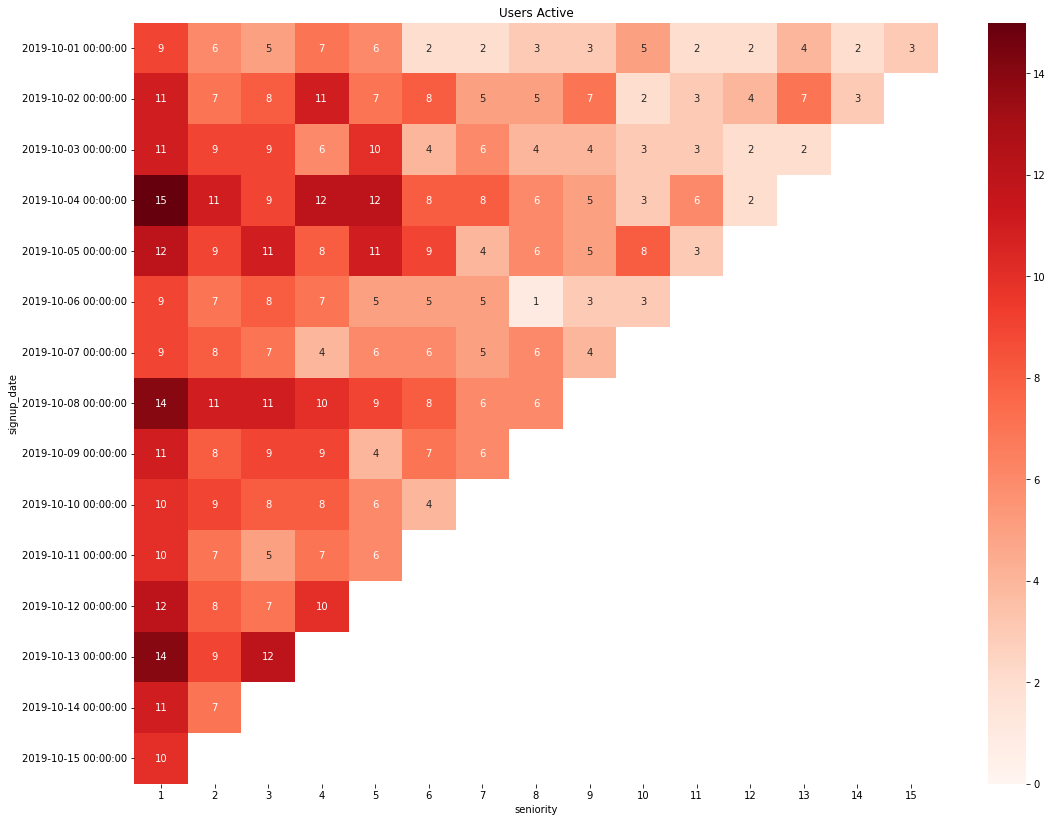

In [8]:
# User Count heatmap
plt.figure(figsize=(18,14))
plt.title('Users Active')
ax = sns.heatmap(data=cohort_counts, annot=True, vmin=0.0,cmap='Reds')
ax.set_yticklabels(cohort_counts.index)
fig=ax.get_figure()
fig.savefig("Retention Counts.png")

plt.show()

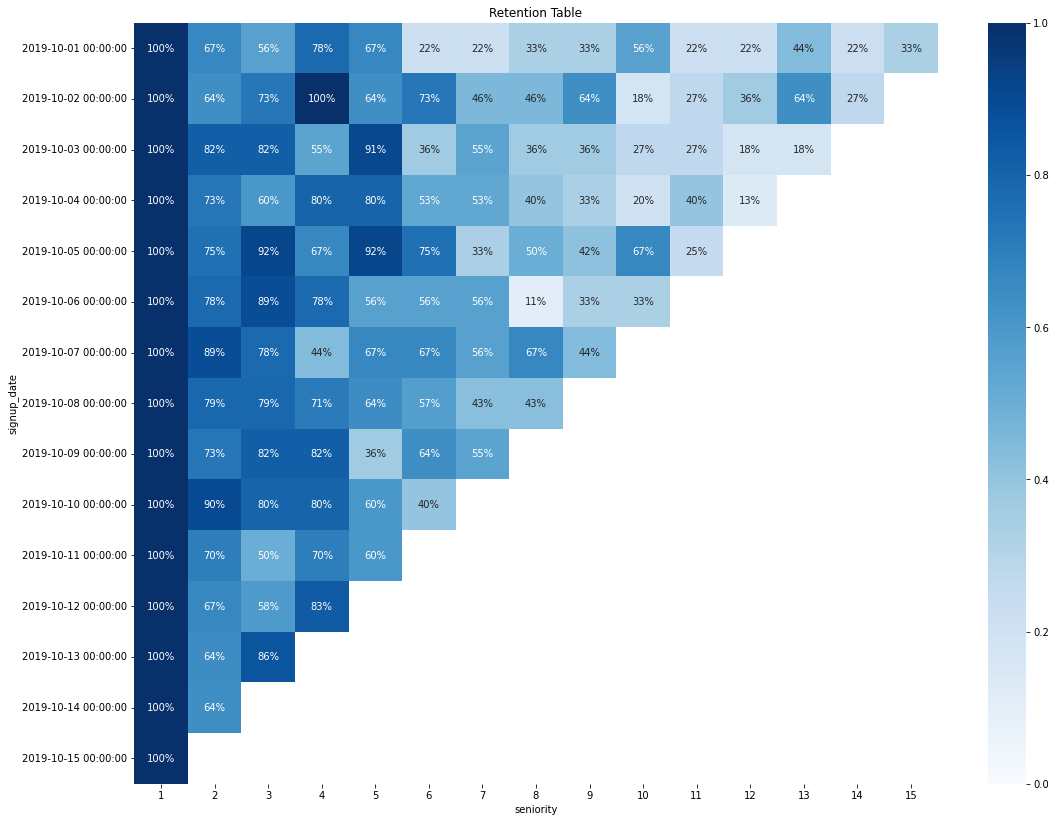

In [10]:
# Retention Rate heatmap
plt.figure(figsize=(18,14))
plt.title('Retention Table')
ax = sns.heatmap(data=retention, annot=True, fmt='.0%', vmin=0.0, vmax=1,cmap='Blues')
ax.set_yticklabels(retention.index)
fig=ax.get_figure()
fig.savefig("Retention_Rate.png")

plt.show()